In [17]:
import tensorflow as tf
import os
import cv2 as cv
import random as rnd
from keras import layers
from tensorflow import keras
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
path = "data/flowers"

items = os.listdir(path)

folder_paths = [path+"/"+item for item in items if os.path.isdir(os.path.join(path, item))]

for index in range(len(folder_paths)):
    print(f"class: {items[index]} path: {folder_paths[index]}")

class: astilbe path: /kaggle/input/flowers/flowers/astilbe
class: daffodil path: /kaggle/input/flowers/flowers/daffodil
class: black_eyed_susan path: /kaggle/input/flowers/flowers/black_eyed_susan
class: bellflower path: /kaggle/input/flowers/flowers/bellflower
class: common_daisy path: /kaggle/input/flowers/flowers/common_daisy
class: coreopsis path: /kaggle/input/flowers/flowers/coreopsis
class: dandelion path: /kaggle/input/flowers/flowers/dandelion
class: water_lily path: /kaggle/input/flowers/flowers/water_lily
class: carnation path: /kaggle/input/flowers/flowers/carnation
class: calendula path: /kaggle/input/flowers/flowers/calendula
class: california_poppy path: /kaggle/input/flowers/flowers/california_poppy
class: sunflower path: /kaggle/input/flowers/flowers/sunflower
class: tulip path: /kaggle/input/flowers/flowers/tulip
class: rose path: /kaggle/input/flowers/flowers/rose
class: magnolia path: /kaggle/input/flowers/flowers/magnolia
class: iris path: /kaggle/input/flowers/flo

In [19]:
with open('labels.txt', 'w') as f:
    for index, name in enumerate(items):
        print(f"{index} {name}\n")
        f.write(f"{index} {name}\n")

0 astilbe

1 daffodil

2 black_eyed_susan

3 bellflower

4 common_daisy

5 coreopsis

6 dandelion

7 water_lily

8 carnation

9 calendula

10 california_poppy

11 sunflower

12 tulip

13 rose

14 magnolia

15 iris



In [20]:
def get_Data(folder_path,cls):
    X = []
    Y=[]
    for root, directories, files in os.walk(folder_path):
        gc.collect()
        print(root)
        for filename in files:
            img=cv.imread(os.path.join(root, filename))
            img=cv.cvtColor(img, cv.COLOR_RGB2BGR)
            img=cv.resize(img, (224,224))
            X.append(img)
            Y.append(cls)
            gc.collect()
    return X,Y

In [21]:
X=[]
Y=[]

for cls,folder_path in enumerate(folder_paths):
    gc.collect()
    x,y=get_Data(folder_path,cls)
    X=X+x
    Y=Y+y

/kaggle/input/flowers/flowers/astilbe
/kaggle/input/flowers/flowers/daffodil
/kaggle/input/flowers/flowers/black_eyed_susan
/kaggle/input/flowers/flowers/bellflower
/kaggle/input/flowers/flowers/common_daisy
/kaggle/input/flowers/flowers/coreopsis
/kaggle/input/flowers/flowers/dandelion
/kaggle/input/flowers/flowers/water_lily
/kaggle/input/flowers/flowers/carnation
/kaggle/input/flowers/flowers/calendula
/kaggle/input/flowers/flowers/california_poppy
/kaggle/input/flowers/flowers/sunflower
/kaggle/input/flowers/flowers/tulip
/kaggle/input/flowers/flowers/rose
/kaggle/input/flowers/flowers/magnolia
/kaggle/input/flowers/flowers/iris


In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25)

In [23]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(f"X_train:{X_train.shape} Y_train:{Y_train.shape} X_test:{X_test.shape} Y_test:{Y_test.shape}")

X_train:(11805, 224, 224, 3) Y_train:(11805,) X_test:(3935, 224, 224, 3) Y_test:(3935,)


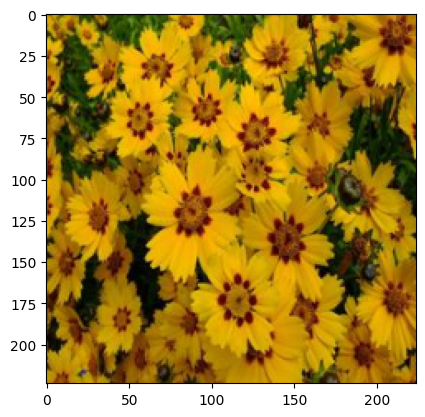

In [24]:
index=rnd.randint(0,len(X_train))

plt.imshow(X_train[index])

plt.show()

In [25]:
base_model=tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [26]:
len(items)

16

In [34]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(16, activation='softmax'))

In [35]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [39]:
model.fit(X_train,Y_train,epochs=17,validation_data=(X_test,Y_test))

369/369 [==============================] - 47s 127ms/step - loss: 0.0467 - accuracy: 0.9890 - val_loss: 0.8534 - val_accuracy: 0.8750


In [40]:
saved_model_dir=''

tf.saved_model.save(model,saved_model_dir)

In [41]:
converter=tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

tflite_model=converter.convert()

In [42]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)